In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/ASUS/OneDrive/Documents/data science/DS Assignments/naive bayes/SalaryData_Train.csv")
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
import pandas as pd
df_test = pd.read_csv("C:/Users/ASUS/OneDrive/Documents/data science/DS Assignments/naive bayes/SalaryData_Test.csv")
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Exploratory Data Analysis

In [3]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<Axes: xlabel='Salary', ylabel='count'>

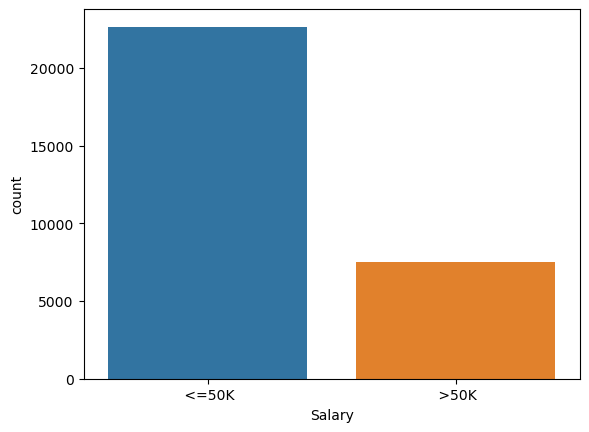

In [7]:
import seaborn as sns
sns.countplot(x =df["Salary"])

<Axes: xlabel='Salary', ylabel='count'>

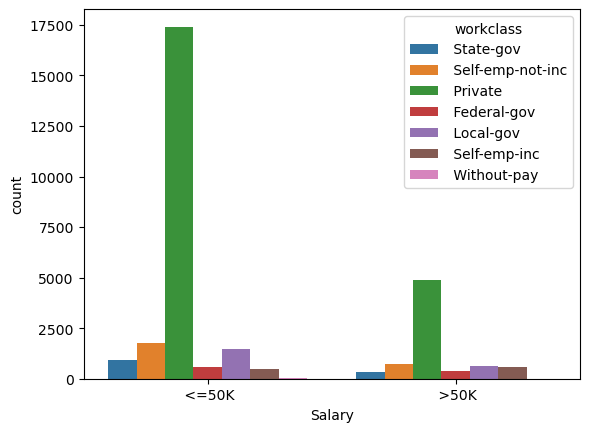

In [16]:
sns.countplot(x= df["Salary"],hue = df["workclass"])

<Axes: xlabel='Salary', ylabel='count'>

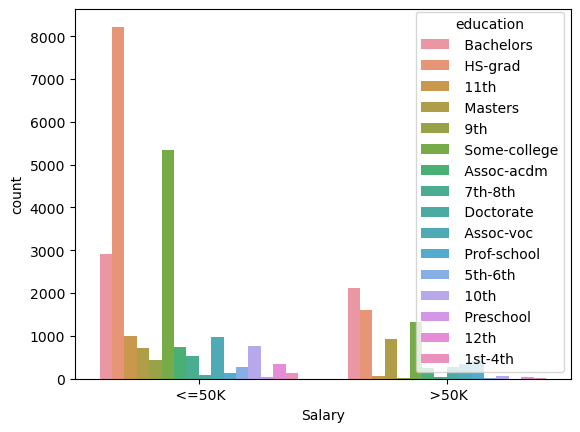

In [18]:
sns.countplot(x=df["Salary"], hue = df["education"])

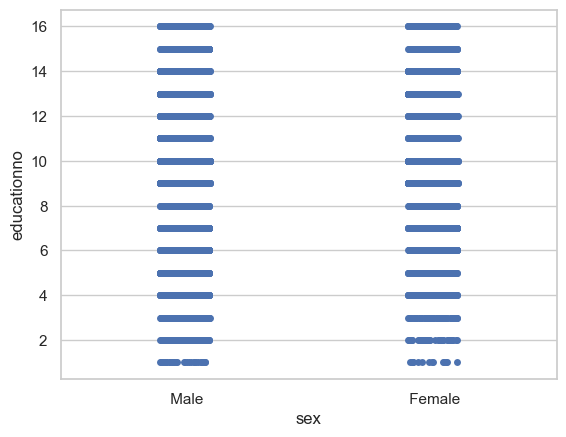

In [42]:
sns.set(style = 'whitegrid')   
       
sns.stripplot(x="sex", y="educationno", data=df) 
  
plt.show() 

# Data Transformation

In [45]:
df_cont = df[df.columns[[0,3,9,10,11]]]
df_cont

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
30156,27,12,0,0,38
30157,40,9,0,0,40
30158,58,9,0,0,40
30159,22,9,0,0,20


In [46]:
df_cat = df[df.columns[[1,2,4,5,6,7,8]]]
df_cat

,workclass,education,maritalstatus,occupation,relationship,race,sex
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female
...,...,...,...,...,...,...,...
30156,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female
30157,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male
30158,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female
30159,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male


In [54]:
df_cont_test = df_test[df_test.columns[[0,3,9,10,11]]]
df_cont_test

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30
...,...,...,...,...,...
15055,33,13,0,0,40
15056,39,13,0,0,36
15057,38,13,0,0,50
15058,44,13,5455,0,40


In [55]:
df_cat_test = df_test[df_test.columns[[1,2,4,5,6,7,8]]]
df_cat_test

,workclass,education,maritalstatus,occupation,relationship,race,sex
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male
...,...,...,...,...,...,...,...
15055,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male
15056,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female
15057,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male
15058,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male


In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit_transform(df_cont)
ss = pd.DataFrame(ss)
ss.columns = list(df_cont)
ss

,age,educationno,capitalgain,capitalloss,hoursperweek
0,0.042779,1.128898,0.146085,-0.218508,-0.077735
1,0.880261,1.128898,-0.147447,-0.218508,-2.331495
2,-0.033356,-0.439733,-0.147447,-0.218508,-0.077735
3,1.108665,-1.224048,-0.147447,-0.218508,-0.077735
4,-0.794703,1.128898,-0.147447,-0.218508,-0.077735
...,...,...,...,...,...
30156,-0.870838,0.736740,-0.147447,-0.218508,-0.244681
30157,0.118914,-0.439733,-0.147447,-0.218508,-0.077735
30158,1.489339,-0.439733,-0.147447,-0.218508,-0.077735
30159,-1.251511,-0.439733,-0.147447,-0.218508,-1.747187


In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit_transform(df_cont_test)
ss = pd.DataFrame(ss)
ss.columns = list(df_cont_test)
ss

,age,educationno,capitalgain,capitalloss,hoursperweek
0,-1.029005,-1.216563,-0.145438,-0.219169,-0.078889
1,-0.057423,-0.434898,-0.145438,-0.219169,0.750131
2,-0.804794,0.737599,-0.145438,-0.219169,-0.078889
3,0.391000,-0.044066,0.852624,-0.219169,-0.078889
4,-0.356371,-1.607395,-0.145438,-0.219169,-0.907909
...,...,...,...,...,...
15055,-0.431108,1.128431,-0.145438,-0.219169,-0.078889
15056,0.017315,1.128431,-0.145438,-0.219169,-0.410497
15057,-0.057423,1.128431,-0.145438,-0.219169,0.750131
15058,0.391000,1.128431,0.562734,-0.219169,-0.078889


In [70]:
import warnings
with warnings.catch_warnings():
    # Setting values in-place is fine, ignore the warning in Pandas >= 1.5.0
    # This can be removed, if Pandas 1.5.0 does not need to be supported any longer.
    # See also: https://stackoverflow.com/q/74057367/859591
    warnings.filterwarnings(
        "ignore",
        category=FutureWarning,
        message=(
            ".*will attempt to set the values inplace instead of always setting a new array. "
            "To retain the old behavior, use either.*"
        ),
    )

pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)






from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat.iloc[:,0] = le.fit_transform(df_cat.iloc[:,0])
df_cat.iloc[:,1] = le.fit_transform(df_cat.iloc[:,1])
df_cat.iloc[:,2] = le.fit_transform(df_cat.iloc[:,2])
df_cat.iloc[:,3] = le.fit_transform(df_cat.iloc[:,3])
df_cat.iloc[:,4] = le.fit_transform(df_cat.iloc[:,4])
df_cat.iloc[:,5] = le.fit_transform(df_cat.iloc[:,5])
df_cat.iloc[:,6] = le.fit_transform(df_cat.iloc[:,6])
print(df_cat)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat_test.iloc[:,0] = le.fit_transform(df_cat_test.iloc[:,0])
df_cat_test.iloc[:,1] = le.fit_transform(df_cat_test.iloc[:,1])
df_cat_test.iloc[:,2] = le.fit_transform(df_cat_test.iloc[:,2])
df_cat_test.iloc[:,3] = le.fit_transform(df_cat_test.iloc[:,3])
df_cat_test.iloc[:,4] = le.fit_transform(df_cat_test.iloc[:,4])
df_cat_test.iloc[:,5] = le.fit_transform(df_cat_test.iloc[:,5])
df_cat_test.iloc[:,6] = le.fit_transform(df_cat_test.iloc[:,6])
print(df_cat_test)

       workclass  education  maritalstatus  occupation  relationship  race  \
0              5          9              4           0             1     4   
1              4          9              2           3             0     4   
2              2         11              0           5             1     4   
3              2          1              2           5             0     2   
4              2          9              2           9             5     2   
...          ...        ...            ...         ...           ...   ...   
30156          2          7              2          12             5     4   
30157          2         11              2           6             0     4   
30158          2         11              6           0             4     4   
30159          2         11              4           0             3     4   
30160          3         11              2           3             5     4   

       sex  
0        1  
1        1  
2        1  
3        1 

In [60]:
x_train = pd.concat([df_cont,df_cat],axis = 1)
print(x_train)
x_test = pd.concat([df_cont_test,df_cat_test],axis = 1)
print(x_test)

       age  educationno  capitalgain  capitalloss  hoursperweek  workclass  \
0       39           13         2174            0            40          5   
1       50           13            0            0            13          4   
2       38            9            0            0            40          2   
3       53            7            0            0            40          2   
4       28           13            0            0            40          2   
...    ...          ...          ...          ...           ...        ...   
30156   27           12            0            0            38          2   
30157   40            9            0            0            40          2   
30158   58            9            0            0            40          2   
30159   22            9            0            0            20          2   
30160   52            9        15024            0            40          3   

       education  maritalstatus  occupation  relationship  race

In [61]:
y_train= df["Salary"]
print(y)
y_test = df_test["Salary"]
print(y_test)

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object
0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object


# Model Building Using MultiNomial Naive Bayes 

In [62]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_train = mnb.predict(x_train)
print(y_pred_train)
y_pred_test = mnb.predict(x_test)
print(y_pred_test)

[' >50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']


# Evaluation Of Model Performance

In [67]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
ac1= accuracy_score(y_train,y_pred_train)
print("Training Accuracy score:", ac1.round(3))

cm1 = confusion_matrix(y_train,y_pred_train)
print("Training Connfusion matrix\n:", cm1.round(3))

cr1 = classification_report(y_train,y_pred_train)
print("Training data classification report:", cr1)



ac2= accuracy_score(y_test,y_pred_test)
print("Testing Accuracy score:", ac2.round(3))

cm2 = confusion_matrix(y_test,y_pred_test)
print("Testing Connfusion matrix:\n", cm2.round(3))

cr2 = classification_report(y_test,y_pred_test)
print("Testing data classification report:", cr2)


Training Accuracy score: 0.773
Training Connfusion matrix
: [[21717   936]
 [ 5913  1595]]
Training data classification report:               precision    recall  f1-score   support

       <=50K       0.79      0.96      0.86     22653
        >50K       0.63      0.21      0.32      7508

    accuracy                           0.77     30161
   macro avg       0.71      0.59      0.59     30161
weighted avg       0.75      0.77      0.73     30161

Testing Accuracy score: 0.775
Testing Connfusion matrix:
 [[10891   469]
 [ 2920   780]]
Testing data classification report:               precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     11360
        >50K       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



# # Model Building Using Gaussian Naive Bayes 

In [68]:
from sklearn.naive_bayes import GaussianNB as gb
gb = gb()
gb.fit(x_train,y_train)
y_pred_train = gb.predict(x_train)
print(y_pred_train)
y_pred_test = gb.predict(x_test)
print(y_pred_test)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']


# Evaluation Of Model Performance

In [69]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
ac1= accuracy_score(y_train,y_pred_train)
print("Training Accuracy score:", ac1.round(3))

cm1 = confusion_matrix(y_train,y_pred_train)
print("Training Connfusion matrix\n:", cm1.round(3))

cr1 = classification_report(y_train,y_pred_train)
print("Training data classification report:", cr1)



ac2= accuracy_score(y_test,y_pred_test)
print("Testing Accuracy score:", ac2.round(3))

cm2 = confusion_matrix(y_test,y_pred_test)
print("Testing Connfusion matrix:\n", cm2.round(3))

cr2 = classification_report(y_test,y_pred_test)
print("Testing data classification report:", cr2)


Training Accuracy score: 0.795
Training Connfusion matrix
: [[21506  1147]
 [ 5040  2468]]
Training data classification report:               precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     22653
        >50K       0.68      0.33      0.44      7508

    accuracy                           0.79     30161
   macro avg       0.75      0.64      0.66     30161
weighted avg       0.78      0.79      0.77     30161

Testing Accuracy score: 0.794
Testing Connfusion matrix:
 [[10762   598]
 [ 2500  1200]]
Testing data classification report:               precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.67      0.32      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



### From above models performance, we can conclude that Gaussian naive bayes performs slighthly good then the multinomial naive bayes model .
Multinomial naive bayes accuracy score is :77
Gaussian naive bayes accuracy score is :79
